In [22]:
#import necessary packages
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.model_selection import train_test_split
import time
import matplotlib.pyplot as plt

In [23]:
#import Data
PL20_21_fixtures = pd.read_csv('Data/2020-21/Fixtures/PL20_21_fixtures.csv')
PL20_21_fixtures

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA,Rating_Home,Rating_Away,Rating difference
0,E0,2020-09-12,12:30,Fulham,Arsenal,0,3,A,0,1,...,1.89,2.02,1.91,2.13,1.92,2.02,1.87,73,80,-7
1,E0,2020-09-12,15:00,Crystal Palace,Southampton,1,0,H,1,0,...,2.13,1.79,2.17,1.85,2.18,1.79,2.12,77,76,1
2,E0,2020-09-12,17:30,Liverpool,Leeds United,4,3,H,3,2,...,2.05,1.85,2.08,1.90,2.16,1.84,2.04,85,72,13
3,E0,2020-09-12,20:00,West Ham United,Newcastle United,0,2,A,0,0,...,1.87,2.04,1.88,2.09,1.91,2.02,1.86,78,77,1
4,E0,2020-09-13,14:00,West Bromwich Albion,Leicester City,0,3,A,0,0,...,1.98,1.93,1.99,1.95,2.01,1.91,1.97,72,80,-8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,E0,2021-05-23,16:00,Liverpool,Crystal Palace,2,0,H,1,0,...,2.04,1.88,2.03,1.98,2.14,1.88,2.00,85,77,8
376,E0,2021-05-23,16:00,Manchester City,Everton,5,0,H,2,0,...,1.89,1.99,1.89,2.20,2.00,2.03,1.85,85,78,7
377,E0,2021-05-23,16:00,Sheffield United,Burnley,1,0,H,1,0,...,1.86,2.05,1.86,2.17,1.90,2.03,1.84,75,76,-1
378,E0,2021-05-23,16:00,West Ham United,Southampton,3,0,H,2,0,...,1.90,2.02,1.91,2.06,2.01,1.99,1.89,78,76,2


In [41]:
print(PL20_21_fixtures.HomeTeam.unique().tolist())
teams = PL20_21_fixtures.HomeTeam.unique().tolist()
PL20_21_fixtures['Wk_h'] = 0
PL20_21_fixtures['Wk_a'] = 0
for team in teams:
    count = 1
    for index, row in PL20_21_fixtures.iterrows():
        if row['HomeTeam'] == team:
            PL20_21_fixtures.at[index, 'Wk_h'] = count
            count = count + 1
        elif row['AwayTeam'] == team:
            PL20_21_fixtures.at[index, 'Wk_a'] = count
            count = count + 1

PL20_21_fixtures

['Fulham', 'Crystal Palace', 'Liverpool', 'West Ham United', 'West Bromwich Albion', 'Tottenham', 'Brighton & Hove Albion', 'Sheffield United', 'Everton', 'Leeds United', 'Manchester Utd', 'Arsenal', 'Southampton', 'Newcastle United', 'Chelsea', 'Leicester City', 'Aston Villa', 'Wolverhampton Wanderers', 'Burnley', 'Manchester City']


,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA,Rating_Home,Rating_Away,Rating difference,Wk,Wk_h,Wk_a
0,E0,2020-09-12,12:30,Fulham,Arsenal,0,3,A,0,1,...,2.13,1.92,2.02,1.87,73,80,-7,1,1,1
1,E0,2020-09-12,15:00,Crystal Palace,Southampton,1,0,H,1,0,...,1.85,2.18,1.79,2.12,77,76,1,1,1,1
2,E0,2020-09-12,17:30,Liverpool,Leeds United,4,3,H,3,2,...,1.90,2.16,1.84,2.04,85,72,13,1,1,1
3,E0,2020-09-12,20:00,West Ham United,Newcastle United,0,2,A,0,0,...,2.09,1.91,2.02,1.86,78,77,1,1,1,1
4,E0,2020-09-13,14:00,West Bromwich Albion,Leicester City,0,3,A,0,0,...,1.95,2.01,1.91,1.97,72,80,-8,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,E0,2021-05-23,16:00,Liverpool,Crystal Palace,2,0,H,1,0,...,1.98,2.14,1.88,2.00,85,77,8,38,38,38
376,E0,2021-05-23,16:00,Manchester City,Everton,5,0,H,2,0,...,2.20,2.00,2.03,1.85,85,78,7,38,38,38
377,E0,2021-05-23,16:00,Sheffield United,Burnley,1,0,H,1,0,...,2.17,1.90,2.03,1.84,75,76,-1,38,38,38
378,E0,2021-05-23,16:00,West Ham United,Southampton,3,0,H,2,0,...,2.06,2.01,1.99,1.89,78,76,2,38,38,38


In [527]:
#functions for feature Engineering
def get_points(team, wk):
    for index, row in PL20_21_fixtures.iterrows():
        #print(row[['HomeTeam','Wk']])
        if row['Wk_h'] == wk and row['HomeTeam'] == team:
            if row['FTR'] == 'H':
                return 3
            if row['FTR'] == 'D':
                return 1
            else:
                return 0
        if row['Wk_a'] == wk and row['AwayTeam'] == team:
            if row['FTR'] == 'A':
                return 3
            if row['FTR'] == 'D':
                return 1
            else:
                return 0


def get_stats(team, wk, stat):
    for index, row in PL20_21_fixtures.iterrows():
        #print(row[['HomeTeam','Wk']])
        if row['Wk_h'] == wk and row['HomeTeam'] == team:
            if stat == 'goals':
                return row['FTHG']
            elif stat == 'shots':
                return row['HST']
            elif stat == 'corners':
                return row['HC']
        elif row['Wk_a'] == wk and row['AwayTeam'] == team:
            if stat == 'goals':
                return row['FTAG']
            elif stat == 'shots':
                return row['AST']
            elif stat == 'corners':
                return row['AC']
            return row[stat]


def get_points_season(team, fr, to):
    out = 0
    for i in range(fr, to):
        out = out + get_points(team, i)
    return out


def get_stats_season(team, fr, to, category):
    test = []
    out = 0
    df2 = 0
    if fr == to: return 0
    for i in range(fr, to):
        out = out + get_stats(team, i, category)
        test.append(out)
        df = pd.Series(test)
        df2 = df.ewm(alpha=0.4).mean()[len(df) - 1]
    return df2


def get_ewm_season(team, fr, to):
    test = []
    out = 0
    if fr == to: return 0
    for i in range(fr, to):
        out = out + get_points(team, i)
        test.append(out)
        df = pd.Series(test)
        df2 = df.ewm(alpha=0.4).mean()[len(df) - 1]
    return df2


def append_form(timespan):
    formH = []
    formA = []
    for index, row in PL20_21_fixtures.iterrows():
        wk_h = row['Wk_h']
        wk_a = row['Wk_a']
        teamH = row['HomeTeam']
        teamA = row['AwayTeam']
        if int(wk_h) - timespan < 1:
            pointsH = get_points_season(teamH, 1, int(wk_h) - 1)
        else:
            pointsH = get_points_season(teamH, int(wk_h) - timespan, int(wk_h) - 1)
        if int(wk_a) - timespan < 1:
            pointsA = get_points_season(teamA, 1, int(wk_a) - 1)
        else:
            pointsA = get_points_season(teamA, int(wk_a) - timespan, int(wk_a) - 1)
        formH.append(pointsH)
        formA.append(pointsA)
    PL20_21_fixtures['formH'] = formH
    PL20_21_fixtures['formA'] = formA


def append_ewm(timespan):
    formH = []
    formA = []
    for index, row in PL20_21_fixtures.iterrows():
        wk_h = row['Wk_h']
        wk_a = row['Wk_a']
        teamH = row['HomeTeam']
        teamA = row['AwayTeam']
        if int(wk_h) - timespan < 1:
            pointsH = get_ewm_season(teamH, 1, int(wk_h))
        else:
            pointsH = get_ewm_season(teamH, int(wk_h) - timespan, int(wk_h) - 1)
        if int(wk_a) - timespan < 1:
            pointsA = get_ewm_season(teamA, 1, int(wk_a))
        else:
            pointsA = get_ewm_season(teamA, int(wk_a) - timespan, int(wk_a) - 1)
        formH.append(pointsH)
        formA.append(pointsA)
    PL20_21_fixtures['ewmH'] = formH
    PL20_21_fixtures['ewmA'] = formA


def append_stats(timespan):
    goals_h = []
    goals_A = []
    shots_H = []
    shots_A = []
    corners_H = []
    corners_A = []

    for index, row in PL20_21_fixtures.iterrows():
        wk_h = row['Wk_h']
        wk_a = row['Wk_a']
        teamH = row['HomeTeam']
        teamA = row['AwayTeam']
        if int(wk_h) - timespan < 1:
            goalsH = get_stats_season(teamH, 1, int(wk_h) - 1, 'goals')
            shotsH = get_stats_season(teamH, 1, int(wk_h) - 1, 'shots')
            cornersH = get_stats_season(teamH, 1, int(wk_h) - 1, 'corners')
        else:
            goalsH = get_stats_season(teamH, int(wk_h) - timespan, int(wk_h) - 1, 'goals')
            shotsH = get_stats_season(teamH, int(wk_h) - timespan, int(wk_h) - 1, 'shots')
            cornersH = get_stats_season(teamH, int(wk_h) - timespan, int(wk_h) - 1, 'corners')

        if int(wk_a) - timespan < 1:
            goalsA = get_stats_season(teamA, 1, int(wk_a) - 1, 'goals')
            shotsA = get_stats_season(teamA, 1, int(wk_a) - 1, 'shots')
            cornersA = get_stats_season(teamA, 1, int(wk_a) - 1, 'corners')
        else:
            goalsA = get_stats_season(teamA, int(wk_a) - timespan, int(wk_a) - 1, 'goals')
            shotsA = get_stats_season(teamA, int(wk_a) - timespan, int(wk_a) - 1, 'shots')
            cornersA = get_stats_season(teamA, int(wk_a) - timespan, int(wk_a) - 1, 'corners')

        goals_h.append(goalsH)
        goals_A.append(goalsA)
        shots_H.append(shotsH)
        shots_A.append(shotsA)
        corners_H.append(cornersH)
        corners_A.append(cornersA)
    PL20_21_fixtures['goalsH'] = goals_h
    PL20_21_fixtures['goalsA'] = goals_A
    PL20_21_fixtures['shotsH'] = shots_H
    PL20_21_fixtures['shotsA'] = shots_A
    PL20_21_fixtures['cornersH'] = corners_H
    PL20_21_fixtures['cornersA'] = corners_A


#Elo Rating
def expected_result(loc, aw):
    dr = loc - aw
    we = (1 / (10 ** (-dr / 400) + 1))
    return [np.round(we, 3), 1 - np.round(we, 3)]


def actual_result(loc, aw):
    if loc < aw:
        wa = 1
        wl = 0
    elif loc > aw:
        wa = 0
        wl = 1
    elif loc == aw:
        wa = 0.5
        wl = 0.5
    return [wl, wa]


def calculate_elo(elo_l, elo_v, local_goals, away_goals, k_value):
    k = k_value
    wl, wv = actual_result(local_goals, away_goals)
    wel, wev = expected_result(elo_l, elo_v)

    elo_ln = elo_l + k * (wl - wel)
    elo_vn = elo_v + k * (wv - wev)

    return elo_ln, elo_vn

In [528]:
def get_points_side(team, wk, home):
    for index, row in PL20_21_fixtures.iterrows():
        if row['Wk_h'] == wk and row['HomeTeam'] == team and home == True:
            if row['FTR'] == 'H':
                return 3
            if row['FTR'] == 'D':
                return 1
            else:
                return 0
        if row['Wk_a'] == wk and row['AwayTeam'] == team and home == False:
            if row['FTR'] == 'A':
                return 3
            if row['FTR'] == 'D':
                return 1
            else:
                return 0
    if wk > 2:
        return get_points_side(team, wk - 1, home)
    else:
        return 0


def get_points_season_side(team, fr, to, home):
    out = 0
    for i in range(fr, to):
        out = out + get_points_side(team, i, home)
    return out


def append_form_side(timespan):
    formH = []
    formA = []
    for index, row in PL20_21_fixtures.iterrows():
        wk_h = row['Wk_h']
        wk_a = row['Wk_a']
        teamH = row['HomeTeam']
        teamA = row['AwayTeam']
        if int(wk_h) - timespan < 1:
            pointsH = get_points_season_side(teamH, 1, int(wk_h) - 1, True)
        else:
            pointsH = get_points_season_side(teamH, int(wk_h) - timespan, int(wk_h) - 1, True)
        if int(wk_a) - timespan < 1:
            pointsA = get_points_season_side(teamA, 1, int(wk_a) - 1, False)
        else:
            pointsA = get_points_season_side(teamA, int(wk_a) - timespan, int(wk_a) - 1, False)
        formH.append(pointsH)
        formA.append(pointsA)
    PL20_21_fixtures['formH_side'] = formH
    PL20_21_fixtures['formA_side'] = formA


In [530]:
#add features to table
append_stats(40)
append_ewm(40)
append_form(7)

#append_form_side(7)
#print(get_points_side( 'Arsenal', 1, True))

In [531]:
#calculate Elo scores
current_elo = {}
for idx, row in PL20_21_fixtures.iterrows():

    local = row['HomeTeam']
    away = row['AwayTeam']
    local_goals = row['FTHG']
    away_goals = row['FTAG']
    #tournament = row['tournament']

    if local not in current_elo.keys():
        current_elo[local] = 1500

    if away not in current_elo.keys():
        current_elo[away] = 1500

    elo_l = current_elo[local]
    elo_v = current_elo[away]
    elo_ln, elo_vn = calculate_elo(elo_l, elo_v, local_goals, away_goals, 30)

    current_elo[local] = elo_ln
    current_elo[away] = elo_vn

    PL20_21_fixtures.loc[idx, 'Elo_h_after'] = elo_ln
    PL20_21_fixtures.loc[idx, 'Elo_a_after'] = elo_vn
    PL20_21_fixtures.loc[idx, 'Elo_h_before'] = elo_l
    PL20_21_fixtures.loc[idx, 'Elo_a_before'] = elo_v

In [532]:
#calculate Differences
PL20_21_fixtures['goalsDifference'] = PL20_21_fixtures['goalsH'] - PL20_21_fixtures['goalsA']
PL20_21_fixtures

PL20_21_fixtures['shotsDifference'] = PL20_21_fixtures['shotsH'] - PL20_21_fixtures['shotsA']
PL20_21_fixtures

PL20_21_fixtures['cornersDifference'] = PL20_21_fixtures['cornersH'] - PL20_21_fixtures['cornersA']
PL20_21_fixtures

PL20_21_fixtures['ewmDifference'] = PL20_21_fixtures['ewmH'] - PL20_21_fixtures['ewmA']
PL20_21_fixtures

PL20_21_fixtures['elo_difference'] = PL20_21_fixtures['Elo_h_before'] - PL20_21_fixtures['Elo_a_before']
PL20_21_fixtures

PL20_21_fixtures['form_difference'] = PL20_21_fixtures['formH'] - PL20_21_fixtures['formA']
PL20_21_fixtures

PL20_21_fixtures['form_difference_side'] = PL20_21_fixtures['formH_side'] - PL20_21_fixtures['formA_side']
PL20_21_fixtures

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,Elo_a_before,goalsDifference,shotsDifference,cornersDifference,ewmDifference,elo_difference,form_difference,formH_side,formA_side,form_difference_side
0,E0,2020-09-12,12:30,Fulham,Arsenal,0,3,A,0,1,...,1500.00,0.000000,0.000000,0.000000,0.000000,0.00,0,0,0,0
1,E0,2020-09-12,15:00,Crystal Palace,Southampton,1,0,H,1,0,...,1500.00,0.000000,0.000000,0.000000,0.000000,0.00,0,0,0,0
2,E0,2020-09-12,17:30,Liverpool,Leeds United,4,3,H,3,2,...,1500.00,0.000000,0.000000,0.000000,0.000000,0.00,0,0,0,0
3,E0,2020-09-12,20:00,West Ham United,Newcastle United,0,2,A,0,0,...,1500.00,0.000000,0.000000,0.000000,0.000000,0.00,0,0,0,0
4,E0,2020-09-13,14:00,West Bromwich Albion,Leicester City,0,3,A,0,0,...,1500.00,0.000000,0.000000,0.000000,0.000000,0.00,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,E0,2021-05-23,16:00,Liverpool,Crystal Palace,2,0,H,1,0,...,1449.24,22.293071,83.652912,92.166285,19.313782,133.14,8,16,4,12
376,E0,2021-05-23,16:00,Manchester City,Everton,5,0,H,2,0,...,1518.27,26.720509,62.728504,82.475726,24.719180,131.52,4,3,12,-9
377,E0,2021-05-23,16:00,Sheffield United,Burnley,1,0,H,1,0,...,1440.12,-13.076847,-24.222834,5.545160,-19.400129,-101.22,0,6,12,-6
378,E0,2021-05-23,16:00,West Ham United,Southampton,3,0,H,2,0,...,1430.10,10.735182,-3.845682,-8.857148,18.155503,119.88,0,6,0,6


In [533]:
rslt_df = PL20_21_fixtures[PL20_21_fixtures['HomeTeam'] == 'Liverpool']
#rslt_df2 = PL20_21_fixtures[PL20_21_fixtures['AwayTeam'] == 'Liverpool' ]
rslt_df
#rslt_df.append(rslt_df2).sort_index()

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,Elo_a_before,goalsDifference,shotsDifference,cornersDifference,ewmDifference,elo_difference,form_difference,formH_side,formA_side,form_difference_side
2,E0,2020-09-12,17:30,Liverpool,Leeds United,4,3,H,3,2,...,1500.00,0.000000,0.000000,0.000000,0.000000,0.00,0,0,0,0
27,E0,2020-09-28,20:00,Liverpool,Arsenal,3,1,H,2,1,...,1528.71,1.000000,0.000000,6.000000,0.000000,1.29,0,3,3,0
52,E0,2020-10-24,20:00,Liverpool,Sheffield United,2,1,H,1,1,...,1444.29,8.466912,14.202206,6.154412,8.381679,86.07,9,9,0,9
61,E0,2020-10-31,17:30,Liverpool,West Ham United,2,1,H,1,1,...,1505.88,2.965996,9.804303,12.977793,4.274168,35.85,3,12,4,8
85,E0,2020-11-22,19:15,Liverpool,Leicester City,3,0,H,2,0,...,1555.83,0.380284,10.273012,8.049093,0.071603,-1.77,1,15,15,0
105,E0,2020-12-06,19:15,Liverpool,Wolverhampton Wanderers,4,0,H,1,0,...,1528.29,10.167517,24.426093,17.916523,4.230733,37.02,0,18,9,9
123,E0,2020-12-16,20:00,Liverpool,Tottenham,2,1,H,1,1,...,1571.97,1.260568,11.496774,18.821578,0.167494,0.69,-2,18,14,4
145,E0,2020-12-27,16:30,Liverpool,West Bromwich Albion,1,1,D,1,0,...,1403.79,17.384513,40.926812,24.254334,20.797890,194.94,8,18,1,17
176,E0,2021-01-17,16:30,Liverpool,Manchester Utd,0,0,D,0,0,...,1601.70,4.659704,10.873044,15.984279,-0.230326,-32.70,-2,14,12,2
183,E0,2021-01-21,20:00,Liverpool,Burnley,0,1,A,0,0,...,1451.28,27.200076,54.421919,39.447502,17.610074,119.13,-1,12,5,7


In [534]:
test = PL20_21_fixtures['FTR']
test.value_counts()

A    153
H    144
D     83
Name: FTR, dtype: int64

In [535]:
#elos=PL20_21_fixtures[['Date_x','HomeTeam','Elo_h_after']].rename(columns={'home_team':'Team','Elo_h_after':'Elo'}).append(PL20_21_fixtures[['Date_x','AwayTeam','Elo_a_after']].rename(columns={'away_team':'Team','Elo_a_after':'Elo'}))
#elos

In [536]:
PL20_21_fixtures.to_csv('Data/2020-21/Fixtures/PL20_21_features.csv')

In [537]:
PL20_21_features = pd.read_csv('Data/2020-21/Fixtures/PL20_21_features.csv')
PL20_21_features

,Unnamed: 0,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,...,Elo_a_before,goalsDifference,shotsDifference,cornersDifference,ewmDifference,elo_difference,form_difference,formH_side,formA_side,form_difference_side
0,0,E0,2020-09-12,12:30,Fulham,Arsenal,0,3,A,0,...,1500.00,0.000000,0.000000,0.000000,0.000000,0.00,0,0,0,0
1,1,E0,2020-09-12,15:00,Crystal Palace,Southampton,1,0,H,1,...,1500.00,0.000000,0.000000,0.000000,0.000000,0.00,0,0,0,0
2,2,E0,2020-09-12,17:30,Liverpool,Leeds United,4,3,H,3,...,1500.00,0.000000,0.000000,0.000000,0.000000,0.00,0,0,0,0
3,3,E0,2020-09-12,20:00,West Ham United,Newcastle United,0,2,A,0,...,1500.00,0.000000,0.000000,0.000000,0.000000,0.00,0,0,0,0
4,4,E0,2020-09-13,14:00,West Bromwich Albion,Leicester City,0,3,A,0,...,1500.00,0.000000,0.000000,0.000000,0.000000,0.00,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,375,E0,2021-05-23,16:00,Liverpool,Crystal Palace,2,0,H,1,...,1449.24,22.293071,83.652912,92.166285,19.313782,133.14,8,16,4,12
376,376,E0,2021-05-23,16:00,Manchester City,Everton,5,0,H,2,...,1518.27,26.720509,62.728504,82.475726,24.719180,131.52,4,3,12,-9
377,377,E0,2021-05-23,16:00,Sheffield United,Burnley,1,0,H,1,...,1440.12,-13.076847,-24.222834,5.545160,-19.400129,-101.22,0,6,12,-6
378,378,E0,2021-05-23,16:00,West Ham United,Southampton,3,0,H,2,...,1430.10,10.735182,-3.845682,-8.857148,18.155503,119.88,0,6,0,6


In [538]:
#prepare Data for ML Algos
#add column for H A X
conditions = [
    (PL20_21_features['FTR'] == 'H'),
    (PL20_21_features['FTR'] == 'A'),
    (PL20_21_features['FTR'] == 'D')]
choices = [0, 1, 2]
PL20_21_features['identifier'] = np.select(conditions, choices)
#PL20_21_features.drop(PL20_21_features[ PL20_21_features.Wk < 6].index, inplace=True)
y = PL20_21_features['identifier'].to_numpy()
feature_names = ['Rating difference', 'Rating_Home', 'Rating_Away', 'ewmH', 'ewmA', 'ewmDifference', 'Elo_h_before','Elo_a_before', 'elo_difference', 'goalsH', 'goalsA', 'goalsDifference', 'shotsH', 'shotsA','shotsDifference', 'cornersH', 'cornersA', 'cornersDifference', 'formH', 'formA', 'form_difference']
#feature_names = ['Rating difference', 'elo_difference', 'ewmDifference', 'goalsDifference', 'shotsDifference', 'cornersDifference', 'form_difference']
X = PL20_21_features[feature_names].to_numpy()
#X = PL20_21_features[['Rating difference', 'eloA', 'eloDifference' ]].to_numpy()


In [539]:
#split Data in training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [540]:
#create manual test and training sets, without gw 1-3
X_train21 = np.split(X, [40, 340, 380], axis=0)
X_train2 = X_train21[1]
X_test2 = X_train21[2]
y_train21 = np.split(y, [40, 340, 380], axis=0)
y_train2 = y_train21[1]
y_test2 = y_train21[2]

In [541]:
print(f'X_train : {X_train.shape}')
print(f'y_train : {y_train.shape}')
print(f'X_test : {X_test.shape}')
print(f'y_test : {y_test.shape}')
print(f'X_train2 : {X_train2.shape}')
print(f'y_train2 : {y_train2.shape}')
print(f'X_test2 : {X_test2.shape}')
print(f'y_test2 : {y_test2.shape}')

X_train : (304, 21)
y_train : (304,)
X_test : (76, 21)
y_test : (76,)
X_train2 : (300, 21)
y_train2 : (300,)
X_test2 : (40, 21)
y_test2 : (40,)


In [542]:
#set up classifiers
rf_model = RandomForestClassifier()
xgb_model = xgb.XGBClassifier(seed=82)
rf_model2 = RandomForestClassifier()
xgb_model2 = xgb.XGBClassifier(seed=82)

In [543]:
rf_model2.fit(X_train2, y_train2)
xgb_model2.fit(X_train2, y_train2)
rf_model2.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [544]:
rf_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)
rf_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [545]:
rf_model.score(X_test, y_test)

0.5131578947368421

In [546]:
rf_model2.score(X_test2, y_test2)

0.625

In [547]:
xgb_model.score(X_test, y_test)

0.5131578947368421

In [548]:
xgb_model2.score(X_test2, y_test2)

0.5

In [549]:
rf1 = []
rf2 = []
xg1 = []
xg2 = []
x = 0
for i in range(100):
    #split Data in training and test set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    #create manual test and training sets, without gw 1-3
    X_train21 = np.split(X, [40, 340, 380], axis=0)
    X_train2 = X_train21[1]
    X_test2 = X_train21[2]
    y_train21 = np.split(y, [40, 340, 380], axis=0)
    y_train2 = y_train21[1]
    y_test2 = y_train21[2]
    #set up classifiers
    rf_model = RandomForestClassifier()
    xgb_model = xgb.XGBClassifier(seed=82)
    rf_model2 = RandomForestClassifier()
    xgb_model2 = xgb.XGBClassifier(seed=82)
    rf_model2.fit(X_train2, y_train2)
    xgb_model2.fit(X_train2, y_train2)
    rf_model2.get_params()
    rf_model.fit(X_train, y_train)
    xgb_model.fit(X_train, y_train)
    rf_model.get_params()
    rf1.append( rf_model.score(X_test, y_test))
    rf2.append(rf_model2.score(X_test2, y_test2))
    xg1.append(xgb_model.score(X_test, y_test))
    xg2.append(xgb_model2.score(X_test2, y_test2))


In [550]:
def Average(lst):
    return sum(lst) / len(lst)

print('RF1', Average(rf1))
print('RF2', Average(rf2))
print('XGB1' , Average(xg1))
print('XGB2' , Average(xg2))

RF1 0.535789473684211
RF2 0.5862500000000005
XGB1 0.5131578947368424
XGB2 0.5


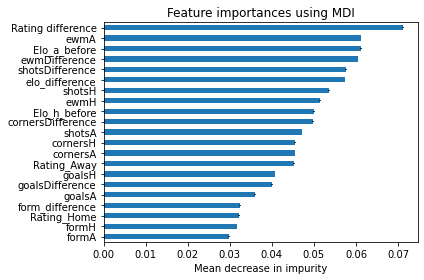

In [469]:
    #start_time = time.time()
importances = rf_model.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_model.estimators_], axis=0)
#elapsed_time = time.time() - start_time


#feature_names = [f"feature {i}" for i in range(X.shape[1])]


forest_importances = pd.Series(importances, index=feature_names)
forest_importances = forest_importances.sort_values()
fig, ax = plt.subplots()

forest_importances.plot.barh(ax=ax, yerr=std)
ax.set_title("Feature importances using MDI")
ax.set_xlabel("Mean decrease in impurity")
fig.tight_layout()

In [227]:
#for measuring training time
from time import time
# F1 score (also F-score or F-measure) is a measure of a test's accuracy.
#It considers both the precision p and the recall r of the test to compute
#the score: p is the number of correct positive results divided by the number of
#all positive results, and r is the number of correct positive results divided by
#the number of positive results that should have been returned. The F1 score can be
#interpreted as a weighted average of the precision and recall, where an F1 score
#reaches its best value at 1 and worst at 0.
from sklearn.metrics import f1_score


def train_classifier(clf, X_train, y_train):
    ''' Fits a classifier to the training data. '''

    # Start the clock, train the classifier, then stop the clock
    start = time()
    clf.fit(X_train, y_train)
    end = time()

    # Print the results
    print("Trained model in {:.4f} seconds".format(end - start))


def predict_labels(clf, features, target):
    ''' Makes predictions using a fit classifier based on F1 score. '''

    # Start the clock, make predictions, then stop the clock
    start = time()
    y_pred = clf.predict(features)

    end = time()
    # Print and return results
    print("Made predictions in {:.4f} seconds.".format(end - start))

    return f1_score(target, y_pred, average='weighted'), sum(target == y_pred) / float(len(y_pred))


def train_predict(clf, X_train, y_train, X_test, y_test):
    ''' Train and predict using a classifer based on F1 score. '''

    # Indicate the classifier and the training set size
    print("Training a {} using a training set size of {}. . .".format(clf.__class__.__name__, len(X_train)))

    # Train the classifier
    train_classifier(clf, X_train, y_train)

    # Print the results of prediction for both training and testing
    f1, acc = predict_labels(clf, X_train, y_train)
    print(f1, acc)
    print("F1 score and accuracy score for training set: {:.4f} , {:.4f}.".format(f1, acc))

    f1, acc = predict_labels(clf, X_test, y_test)
    print("F1 score and accuracy score for test set: {:.4f} , {:.4f}.".format(f1, acc))

In [225]:
train_predict(xgb_model, X_train, y_train, X_test, y_test)
print('')
train_predict(rf_model, X_train, y_train, X_test, y_test)

Training a XGBClassifier using a training set size of 304. . .
Trained model in 0.3911 seconds
Made predictions in 0.0156 seconds.
1.0 1.0
F1 score and accuracy score for training set: 1.0000 , 1.0000.
Made predictions in 0.0000 seconds.
F1 score and accuracy score for test set: 0.4669 , 0.4737.

Training a RandomForestClassifier using a training set size of 304. . .
Trained model in 0.2512 seconds
Made predictions in 0.0317 seconds.
1.0 1.0
F1 score and accuracy score for training set: 1.0000 , 1.0000.
Made predictions in 0.0156 seconds.
F1 score and accuracy score for test set: 0.3832 , 0.3816.
